In [ ]:
import torch

# Trace

In [ ]:
a = torch.tensor([[1,0,1], [1, 2, 1], [-1, 1, -4]], dtype=torch.float).reshape(-1,3)
print(a)
print("Trace: ", torch.trace(a))

tensor([[ 1.,  0.,  1.],
        [ 1.,  2.,  1.],
        [-1.,  1., -4.]])
Trace:  tensor(-1.)


# Det

In [ ]:
a = torch.tensor([[1,0,1], [1, 2, 1], [-1, 1, -4]], dtype=torch.float).reshape(-1,3)
print(a)
print("Det: ", torch.linalg.det(a))

tensor([[ 1.,  0.,  1.],
        [ 1.,  2.,  1.],
        [-1.,  1., -4.]])
Det:  tensor(-6.)


# Rank

In [ ]:
a = torch.tensor([[1,0,1], [1, 2, 1], [-1, 1, -4]], dtype=torch.float).reshape(-1,3)
print(a)
print("Det: ", torch.linalg.matrix_rank(a))

tensor([[ 1.,  0.,  1.],
        [ 1.,  2.,  1.],
        [-1.,  1., -4.]])
Det:  tensor(3)


# Dot product

In [ ]:
A = torch.tensor([[1,0,1], [1, 2, 1], [-1, 1, -4]], dtype=torch.float).reshape(-1,3)
b = torch.tensor([1,1,0], dtype=torch.float).reshape(-1,1)
x = torch.mm(torch.inverse(A), b) 
x

tensor([[ 1.3333],
        [ 0.0000],
        [-0.3333]])

# Norm

In [ ]:
a = torch.tensor([3,4], dtype=torch.float).reshape(-1,1)
norm_0 = torch.norm(a, p=0)
norm_1 = torch.norm(a, p=1)
norm_0

tensor(2.)

# Angle

In [ ]:
a = torch.tensor([1, 1], dtype=torch.float).reshape(-1,1)
b = torch.tensor([1, 2], dtype=torch.float).reshape(-1,1)

cos = torch.mm(a.T, b)/(torch.norm(a, p=2) * torch.norm(b, p=2))
torch.acos(cos)

tensor([[0.3218]])

# Project

In [ ]:
a = torch.tensor([1, 2, 3], dtype=torch.float).reshape(-1,1)
b = torch.tensor([5, 6, 2], dtype=torch.float).reshape(-1,1)
#Project vector a on vector b

b_norm = torch.norm(b, p = 2)
project_a_on_b = (torch.mm(a.T, b) / b_norm ** 2) * b
project_a_on_b

tensor([[1.7692],
        [2.1231],
        [0.7077]])

# Eigenvalues, Eigenvectors

In [ ]:
a = torch.tensor([[4, 2], [-5, -3]], dtype=torch.float)
eigenvalues , eigenvectors = torch.eig(a, eigenvectors=True)

eigenvalues = torch.diag(eigenvalues[:,0])
eigenvectors_inverse = torch.inverse(eigenvectors)

torch.mm(eigenvectors, torch.mm(eigenvalues, eigenvectors_inverse))

tensor([[ 4.0000,  2.0000],
        [-5.0000, -3.0000]])

# Cholesky

In [ ]:
a = torch.tensor([[25, 15, 5], [15, 18, 0], [5, 0, 11]], dtype=torch.float)
l = torch.linalg.cholesky(a)
torch.mm(l, l.T)

tensor([[25., 15.,  5.],
        [15., 18.,  0.],
        [ 5.,  0., 11.]])

# SVD

In [ ]:
a = torch.tensor([[3, 2], [2, 3], [2, -2]], dtype=torch.float)
u, s, v = torch.svd(a)
s = torch.diag(s)
torch.dist(a, torch.mm(torch.mm(u, s), v.T))
# u @ s same torch.mm(u, s)

# SVD: Image Compression

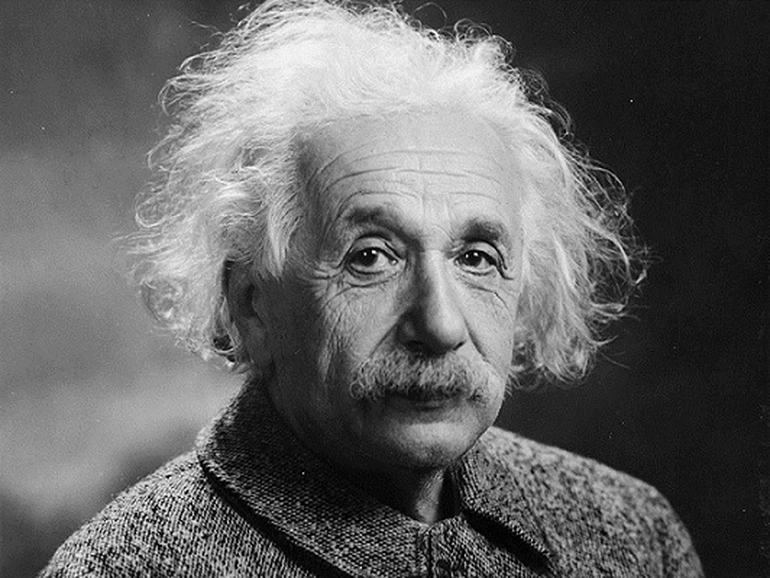

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("./SVD.png", 0)
cv2_imshow(img)

In [ ]:
img_tensor = torch.tensor(img, dtype=torch.float)
u, s, v = torch.svd(img_tensor)
s = torch.diag(s)

In [ ]:
r = 100
img_svd = u[:, :r] @ s[:r, :r] @ v.T[:r, :]


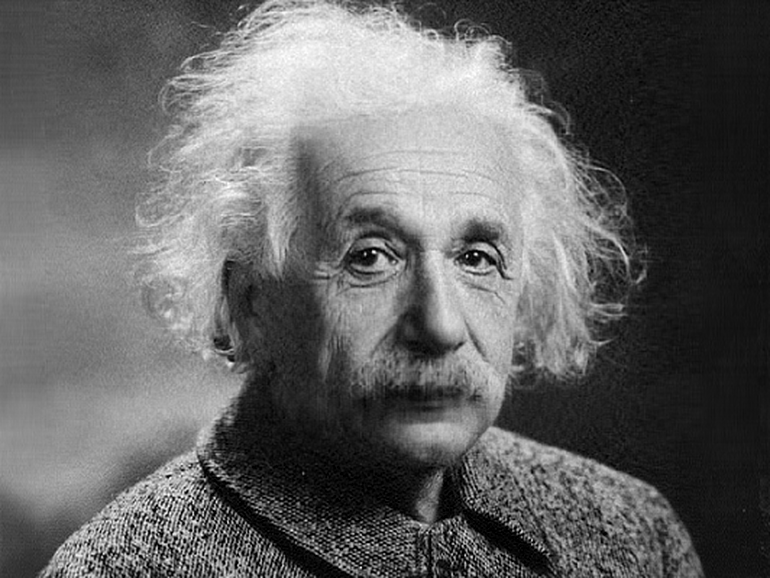

In [ ]:
cv2_imshow(img_svd.numpy())

In [ ]:
cv2.imwrite("./img.png", img_svd.numpy())

True

In [ ]:
import os
old = os.stat("./SVD.png")
new = os.stat("./img.png")
print(f"File Size before SVD: {round(old.st_size/1024, 2)} Kb")
print(f"File Size after SVD: {round(new.st_size/1024, 2)} Kb")

File Size before SVD: 294.23 Kb
File Size after SVD: 277.23 Kb
